In [ ]:
!pip install seg

In [2]:
import numpy as np
import segyio
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

ModuleNotFoundError: No module named 'segyio'

In [7]:
# Set the default plot size for matplotlib figures
matplotlib.rcParams['figure.figsize'] = (11.75, 8.5)

In [1]:
base_segy = "DAT_0125_A1.sgy"

In [17]:
f = segyio.open(base_segy, ignore_geometry = True)
segyio.tools.wrap(f.text[0])

'This file contains GPR data and was generated by RadExplorer software. It has\nfew modifications to standard SEG-Y: 1.   All time-based values (i.e. sample\ninterval and delay) are represented in PICOsecons, not in MICROsecons or\nMILLIseconds. 2.    Any trace may have so-called mark - an integer number. This\nmark is placed into 239-240 bytes of the Trace Header. When a trace has a mark,\nbytes 237-238 contain a mark indicator equal to 55H. 3.     The coordinates\n(stored in standard SEG-Y fields, bytes 73-88) are always supposed to be\nmeasured in either meters or arc seconds. 4.   The geographic coordinates, when\navailable, are saved to bytes 229-232 (longitude) and 233-236 (latitude). The\nvalues are saved as decimal degrees multiplied by 1000000 and within the format\nare stored as signed long integer numbers (4-byte long). In this case, in bytes\n227-228 is recorded 1, otherwise - 0 (this is a flag of geographic coordinates\navailability).\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [11]:
print(segyio.tools.wrap(f.text[0]))

This file contains GPR data and was generated by RadExplorer software. It has
few modifications to standard SEG-Y: 1.   All time-based values (i.e. sample
interval and delay) are represented in PICOsecons, not in MICROsecons or
MILLIseconds. 2.    Any trace may have so-called mark - an integer number. This
mark is placed into 239-240 bytes of the Trace Header. When a trace has a mark,
bytes 237-238 contain a mark indicator equal to 55H. 3.     The coordinates
(stored in standard SEG-Y fields, bytes 73-88) are always supposed to be
measured in either meters or arc seconds. 4.   The geographic coordinates, when
available, are saved to bytes 229-232 (longitude) and 233-236 (latitude). The
values are saved as decimal degrees multiplied by 1000000 and within the format
are stored as signed long integer numbers (4-byte long). In this case, in bytes
227-228 is recorded 1, otherwise - 0 (this is a flag of geographic coordinates
availability).                       C21 PROCESSING:
C21 PROCESSIN

In [12]:
f.samples[:5]

array([0.   , 0.995, 1.99 , 2.985, 3.98 ])

In [13]:
with segyio.open(base_segy) as segyf:
    n_traces = segyf.tracecount
    sample_rate = segyio.tools.dt(segyf)
    n_samples = segyf.samples.size
    n_il = len(segyf.iline)

RuntimeError: unable to find sorting.Check iline, (189) and xline (193) in case you are sure the file is a 3D sorted volume

In [19]:
f = segyio.open(base_segy, ignore_geometry = True)
ntraces    = len(f.trace)
inlines    = []
crosslines = []

for i in range(ntraces):
    headeri = f.header[i]
    inlines.append(headeri[segyio.su.iline])
    crosslines.append(headeri[segyio.su.xline])

print(f'{ntraces} traces')
print(f'first 10 inlines: {inlines[:100]}')
print(f'first 10 crosslines: {crosslines[:100]}')

202 traces
first 10 inlines: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
first 10 crosslines: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
inlines = []
crosslines = []
for h in f.header:
    inlines.append(h[segyio.su.iline])
    crosslines.append(h[segyio.su.xline])
        
print(f'{ntraces} traces')
print(f'first 10 inlines: {inlines[:10]}')
print(f'first 10 crosslines: {crosslines[:10]}')

202 traces
first 10 inlines: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
first 10 crosslines: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


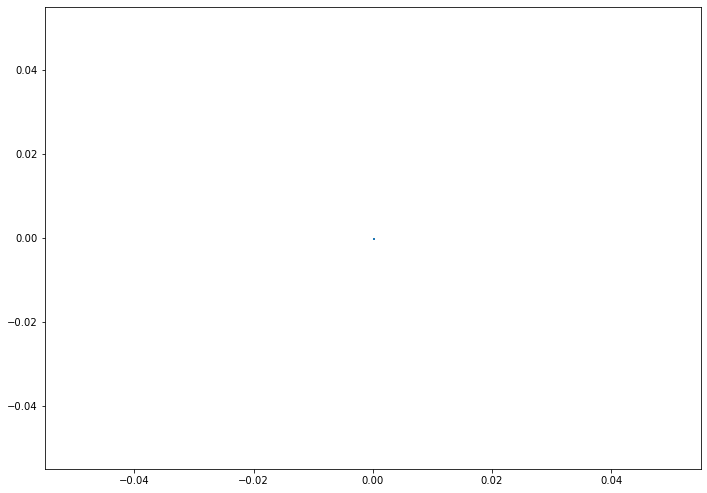

In [16]:
# Plot the inline and crossline as a scatter plot
plt.scatter(crosslines, inlines, marker="s", s=1)